In [1]:
import os
import openpyxl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_3355903/1288583809.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
responses_path = "../data/responses/form_responses.xlsx"

In [3]:
dic = {
    'EXP A': 'expA',
    'EXP B': 'expB',
    'EXP C': 'expC',
    'EXP D': 'expD',
    'EXP E': 'expE',
}

In [4]:
# List of class directories
class_directories = ['expA', 'expB', 'expC', 'expD', 'expE']

In [5]:
shuffle_folder = "../data/experiment/shuffled"
# get the actual classes
actual_classes = []
image_files = os.listdir(shuffle_folder)
for image_file in image_files:
    for key in dic.keys():
        if dic[key] in image_file:
            actual_classes.append(dic[key])
            break

In [9]:
workbook = openpyxl.load_workbook(responses_path)
sheet = workbook.active
nb_classes = len(class_directories)
confusion_matrix = np.zeros((nb_classes, nb_classes))

user_accuracies = []
for row in sheet.iter_rows(min_row=2, values_only=True):
    correct_count = 0
    for column in range(8, 28):
        predicted = dic[row[column]]
        actual = actual_classes[column - 8]
        predicted_index = actual_index = -1
        for idx, cls in enumerate(class_directories):
            if cls == predicted:
                predicted_index = idx
            if cls == actual:
                actual_index = idx
        if predicted == actual:
            correct_count += 1
        confusion_matrix[actual_index][predicted_index] += 1
        # print(f'predicted {predicted}  Actual {actual_classes[column - 8]} {"correct" if predicted == actual_classes[column - 8] else "wrong"}')
    accuracy = round(100 * correct_count / 20, 2)   
    user_accuracies.append(accuracy)
    
average_accuracy = round(sum(user_accuracies) / len(user_accuracies), 2)
confusion_matrix = confusion_matrix / len(user_accuracies)
print(confusion_matrix)
print(user_accuracies)


[[2. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [2. 0. 1. 2. 1.]
 [0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 2.]]
[35.0]


In [7]:
print(f"Accuracy: {average_accuracy}%")

Accuracy: 35.0%


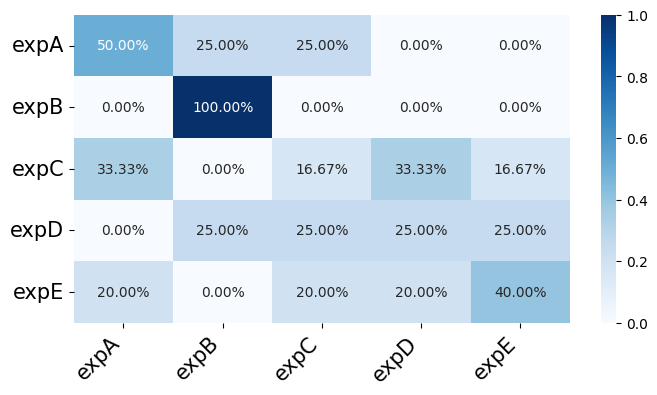

In [8]:
plt.figure(figsize=(8,4))

class_names = list(class_directories)
confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(float)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2%',  cmap='Blues')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.show()